# Solve Poisson's equation using FFT

$$\nabla^2 \phi = f$$

for 

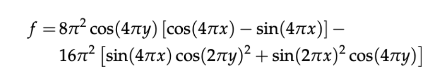

The analytical solution is:


$$\phi = \sin(2\pi x)^2\cos(4\pi y) + \sin(4\pi x)\cos(2\pi y)^2$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## A. Check/plot analytical solution:

In [2]:
# Create an XY grid

# Set number of points
nx = 256
ny = 256

# Min/Max values for the axes
x_min = 0.
x_max = 1.

y_min = 0.
y_max = 1.

# Define step sizes 
dx = (x_max - x_min)/nx
dy = (y_max - y_min)/ny

print(dx)
#print(dy)

0.00390625


In [3]:
# Create the axes:
x = np.arange(x_min, x_max, dx)
y = np.arange(y_min, y_max, dy)

#print(x.shape, y.shape)

# We create the 2D domain
x_2d, y_2d = np.meshgrid(x, y)

#print(x_2d.shape, y_2d.shape)

#### Create function for the kown sln:


$$\phi(x, y) = \sin(2\pi x)^2\cos(4\pi y) + \sin(4\pi x)\cos(2\pi y)^2$$

In [4]:
def exact_sln(xx, yy):
    """
    Function to compute the kown sln.
    Inputs: xx->x_2d, yy->y_2d
    Output: exact sln
    """
    
    phi_exact = (np.sin(2*np.pi*xx)**2)*(np.cos(4*np.pi*yy)) + \
    (np.sin(4*np.pi*xx))*(np.cos(2*np.pi*yy)**2)
    
    return phi_exact 

In [5]:
# Evaluate the function using our 2D grid

z_sln = exact_sln(x_2d, y_2d)

#print(z_sln.shape)

### Plotting the function for $\phi(x,y)$:

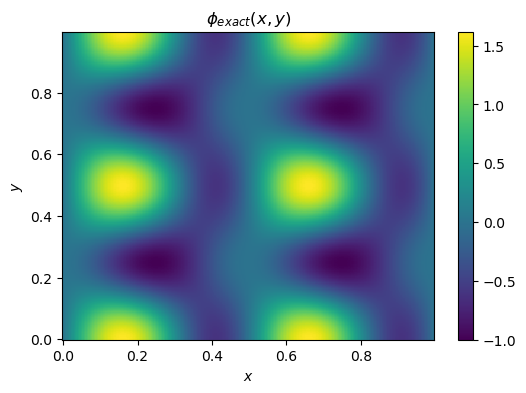

In [6]:
# Figure environment

plt.figure(figsize=(6,4))

surf = plt.pcolor(x_2d, y_2d, z_sln)

plt.colorbar(surf)

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.title(r"$\phi_{exact}(x,y)$")

plt.show()

In [7]:
from mpl_toolkits.mplot3d import Axes3D

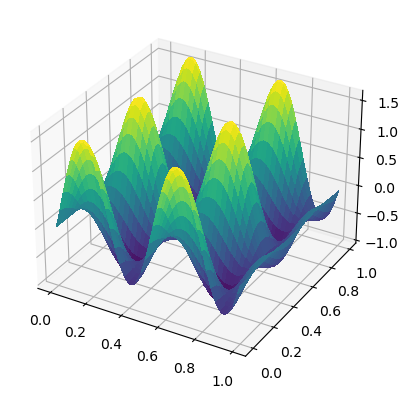

In [8]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(x_2d, y_2d, z_sln, \
     cmap = 'viridis', linewidth=0, antialiased=False)

plt.show()

## B. Use FFT method to find the numerical sln:

### 1. Calculate the spatial frequencies ($k_x, k_y$)

In [9]:
# Get the spatial frequencies / wavenumbers

k_x = np.fft.fftfreq(x.size)/dx
k_y = np.fft.fftfreq(y.size)/dy

#print(k_x.size, k_y.size)

#print(k_x)

### 2. Frequency-space meshgrid:

In [10]:
# Create a grid in Fourier space

kx_2d, ky_2d = np.meshgrid(k_x, k_y)

print(ky_2d)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 2.  2.  2. ...  2.  2.  2.]
 ...
 [-3. -3. -3. ... -3. -3. -3.]
 [-2. -2. -2. ... -2. -2. -2.]
 [-1. -1. -1. ... -1. -1. -1.]]


### 3. Define the function $f(x,y)$

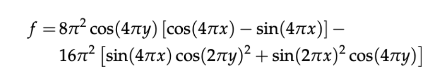

In [11]:
def rhs_function(xx, yy):
    """
    Function to define f(x,y), which is the RHS of the Poission eq.
    Inputs: xx -> x_2d, yy -> y_2d
    Ouput: rhs
    """
    
    rhs = 8*(np.pi**2)*np.cos(4*np.pi*yy)*(np.cos(4*np.pi*xx)\
    - np.sin(4*np.pi*xx)) - 16*(np.pi**2)*(np.sin(4*np.pi*xx)\
    *np.cos(2*np.pi*yy)**2 + (np.sin(2*np.pi*xx)**2)\
    *np.cos(4*np.pi*yy))
    
    return rhs

In [12]:
# Evaluate this in X, Y

f_xy = rhs_function(x_2d, y_2d)


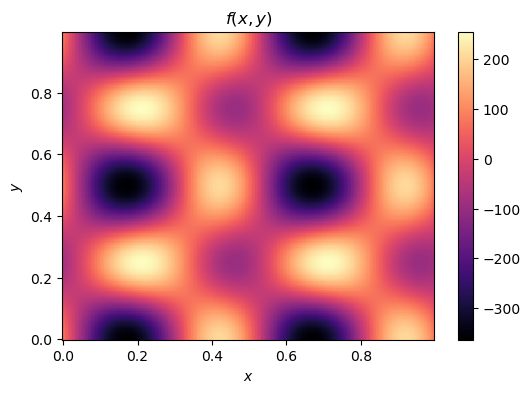

In [13]:
# Figure environment

plt.figure(figsize=(6,4))

f_surf = plt.pcolor(x_2d, y_2d, f_xy, cmap = 'magma')

plt.colorbar(f_surf)

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.title(r"$f(x,y)$")

plt.show()

### 4. Fast Fourier transform of the function $f(x,y)$:

In [14]:
# We use numpy functions to do the FFT:

f_kk = np.fft.fft2(f_xy)

print(f_kk)

[[ 1.51796797e-10+0.00000000e+00j  5.54976188e-12-1.31729499e-10j
   4.63466682e-10+2.58725758e+06j ... -5.39373420e-11-2.49038610e-10j
   4.81200053e-10-2.58725758e+06j  5.54976188e-12+1.31729499e-10j]
 [ 3.01183692e-10-1.43918163e-11j -1.57755276e-12-6.46583137e-13j
  -3.00336921e-10-2.79413132e-10j ...  7.19829847e-13-9.46721445e-13j
  -2.71711903e-10+2.80318375e-10j  2.84315997e-13-1.01049806e-12j]
 [-2.58725758e+06+6.79383996e-10j -2.88850294e-10-1.03467035e-10j
   2.58725758e+06+2.58725758e+06j ...  1.20878015e-10-2.22560687e-10j
   2.58725758e+06-2.58725758e+06j -2.87344357e-10+1.03877461e-10j]
 ...
 [-1.88033728e-10-1.47323610e-12j -2.20179072e-12+2.31078295e-12j
   1.57978913e-10+1.65204379e-10j ... -7.63266233e-13-1.23887774e-12j
   1.80306107e-10-1.48524070e-10j -1.40190709e-12+1.48783081e-12j]
 [-2.58725758e+06-6.53008650e-10j -2.87344357e-10-1.03877461e-10j
   2.58725758e+06+2.58725758e+06j ...  1.19890977e-10-2.22110312e-10j
   2.58725758e+06-2.58725758e+06j -2.88850294e-

In [15]:
# Spatial frequencies in Fourier space

kx_2d, ky_2d = np.meshgrid(sorted(k_x), sorted(k_y))


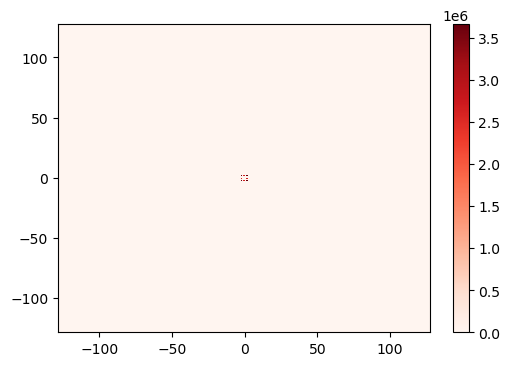

In [16]:
# Figure environment for the Fourier image

plt.figure(figsize=(6,4))

fourier_surf = plt.pcolor(kx_2d, ky_2d,\
               np.abs(np.fft.fftshift(f_kk)), cmap = "Reds")

plt.colorbar(fourier_surf)

plt.show()

### 5. Get $\Phi_{kk}$ based on eq. 9.16 from Zingale's book:

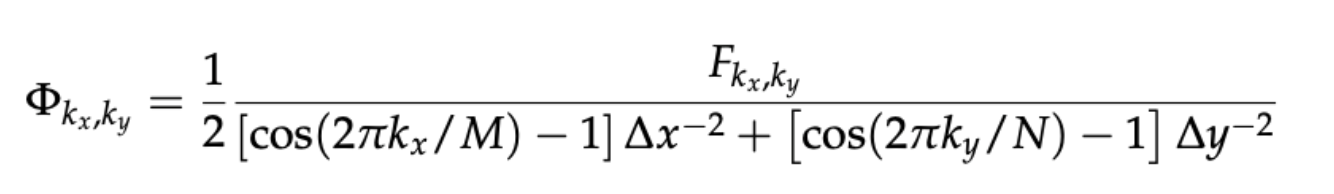

In [24]:
# Function to get Phi_kk in FOurier space

def phi_kk(K_XX, K_YY, F_kk):
    
    # Isolate the 0 frequency
    stamp_cont = F_kk[0,0]
    print(stamp_cont)
    
    # Calculate Phi_kk
    
    phi_kk_function = 0.5*F_kk/((np.cos(2*np.pi*K_XX/nx) - 1)/dx**2\
    + (np.cos(2*np.pi*K_YY/ny) - 1)/dy**2)
    
    # Put back the 0 frequency
    phi_kk_function[0, 0] = stamp_cont
    
    return phi_kk_function

In [25]:
# Compute solution in Fourier space
fourier_sln = phi_kk(kx_2d, ky_2d, f_kk)

(1.51796797354109e-10+0j)


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == "":
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == "":


In [26]:
# iFFT of phi_kk to get phi in real space 

f_sln = np.fft.ifft2(fourier_sln)

# Return solution in real space
numer_sln = np.real(f_sln)

print(f_sln)

[[-inf+nanj  inf+nanj -inf+nanj ...  inf+nanj -inf+nanj  inf+nanj]
 [ inf+nanj -inf+nanj  inf+nanj ... -inf+nanj  inf+nanj -inf+nanj]
 [-inf+nanj  inf+nanj -inf+nanj ...  inf+nanj -inf+nanj  inf+nanj]
 ...
 [ inf+nanj -inf+nanj  inf+nanj ... -inf+nanj  inf+nanj -inf+nanj]
 [-inf+nanj  inf+nanj -inf+nanj ...  inf+nanj -inf+nanj  inf+nanj]
 [ inf+nanj -inf+nanj  inf+nanj ... -inf+nanj  inf+nanj -inf+nanj]]


### 6. Plotting the numerical FFT sln:

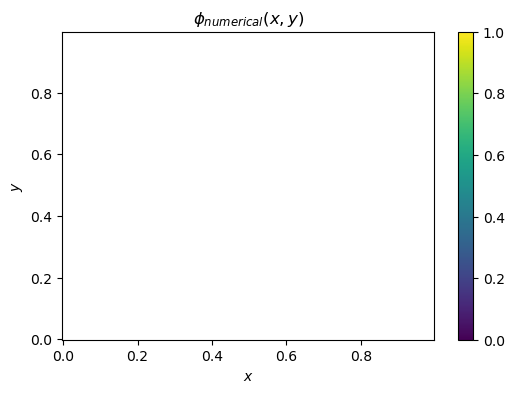

In [20]:
# Figure environment

plt.figure(figsize=(6,4))

A = plt.pcolor(x_2d, y_2d, numer_sln)

plt.colorbar(A)

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.title(r"$\phi_{numerical}(x,y)$")

plt.show()

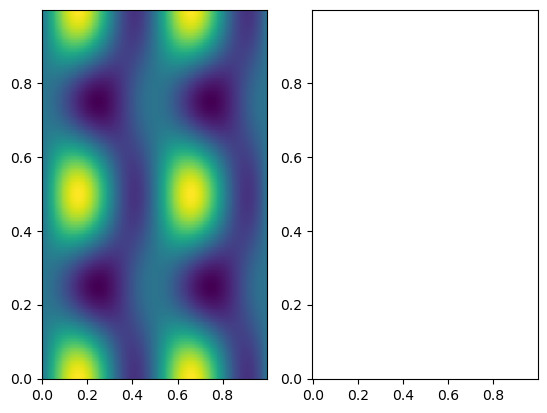

In [21]:
fig, ax = plt.subplots(1, 2)

ax[0].pcolor(x_2d, y_2d, z_sln)
ax[1].pcolor(x_2d, y_2d, numer_sln)

plt.show()

### 7. Error analysis:

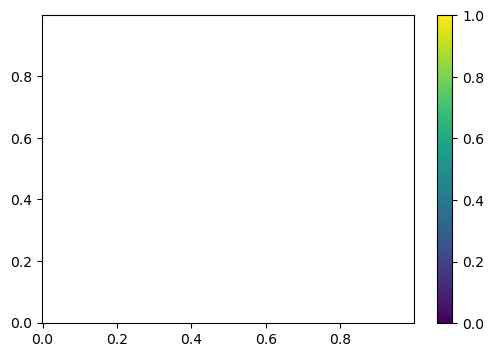

In [22]:
# Absolute error map:

# Figure environment

plt.figure(figsize=(6,4))

err_surf = plt.pcolor(x_2d, y_2d, np.abs(numer_sln - z_sln))

plt.colorbar(err_surf)

plt.show()

### L_2 norm error:

In [23]:
# L_2 norm error

#a = np.sum((numer_sln - Z_sln)**2)

L2_error = np.sqrt((np.sum((numer_sln - z_sln)**2)/(nx*ny)))

print(L2_error)

inf
